In [61]:
from utils.df_handle import *
sys.path.append("E:\\penv\\Lib\\site-packages")
from sklearn import *
from pmdarima import *
from pmdarima import auto_arima
from statsmodels import *
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [11]:
sql=f""" select date(date_trunc(thang,month)) ngaychungtu ,masanpham,makenhkh,sum(soluong) soluong
from spatial-vision-343005.biteam.f_monthly_sales
where date(thang)<'2021-05-01' and masanpham not like 'V%'
group by 1,2,3
union all

select date(date_trunc(ngaychungtu,month)) ngaychungtu ,masanpham,makenhkh,sum(soluong) soluong
from spatial-vision-343005.biteam.f_sales
where date(ngaychungtu)<'2022-06-01' and masanpham not like 'V%'
group by 1,2,3 """

In [12]:
df = get_bq_df(sql)

In [13]:
df

,ngaychungtu,masanpham,makenhkh,soluong
0,2020-09-01,EH047,CLC,1398.0
1,2020-09-01,EH066,OTC,3806.0
2,2020-09-01,EH068,CLC,294.0
3,2020-09-01,EH074,CLC,653.0
4,2020-09-01,EH083,CLC,253.0
...,...,...,...,...
7666,2021-11-01,EH068,INS,100.0
7667,2021-09-01,EH088,DLPP,70.0
7668,2021-10-01,EH117,OTC,22.0
7669,2021-06-01,EH084,OTC,26.0


In [190]:
df1=df

In [191]:
df1['ngaychungtu']= pd.to_datetime(df1['ngaychungtu'])


In [192]:
df1['soluong']= df1['soluong'].astype('int64')

In [62]:
# df1['ngaychungtu']= df1['ngaychungtu'].astype('str')

In [193]:
df1

,ngaychungtu,masanpham,makenhkh,soluong
0,2020-09-01,EH047,CLC,1398
1,2020-09-01,EH066,OTC,3806
2,2020-09-01,EH068,CLC,294
3,2020-09-01,EH074,CLC,653
4,2020-09-01,EH083,CLC,253
...,...,...,...,...
7666,2021-11-01,EH068,INS,100
7667,2021-09-01,EH088,DLPP,70
7668,2021-10-01,EH117,OTC,22
7669,2021-06-01,EH084,OTC,26


In [ ]:
# for i in df['makenhkh'].unique().tolist():
#     for t in df['masanpham'].unique().tolist():
#         data_time_qty = df[(df['makenhkh']==i)&(df['masanpham']==t)][['ngaychungtu','soluong']].set_index('ngaychungtu').sort_index()


In [236]:
osla =df1[(df1['masanpham']=='OH031')][['ngaychungtu','makenhkh','soluong']]

In [237]:
osla.to_clipboard()

In [235]:
osla.to_csv('osla.csv')

In [194]:
data_time_qty = df1[(df1['makenhkh']=='OTC')&(df1['masanpham']=='OH031')][['ngaychungtu','soluong']]#.set_index('ngaychungtu').sort_index()

In [200]:
data_time_qty = data_time_qty.sort_values(ascending=True,by='ngaychungtu').reset_index(drop=True)

In [ ]:
# stepwise_model=auto_arima(data_time_qty,start_p=1, start_q=1,max_p=5,max_q=5,
#                           m=52,start_P=1, d=1,trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

In [ ]:
# result = adfuller(data_time_qty.soluong.dropna())
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

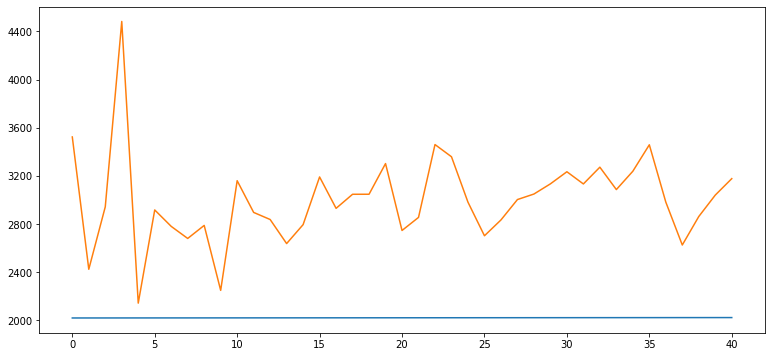

In [201]:
plt.figure(figsize=(13,6))
plt.plot(data_time_qty)
plt.show()

In [21]:
from statsmodels.tsa import *

In [ ]:
result= seasonal_decompose(data_time_qty,model='multiplicative')


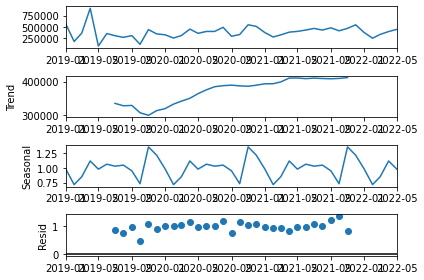

In [203]:
result.plot()
plt.show()

In [204]:
train

,soluong
ngaychungtu,
2019-01-01,567346
2019-02-01,165717
2019-03-01,355261
2019-04-01,917915
2019-05-01,62959
2019-06-01,345768
2019-07-01,295917
2019-08-01,259302
2019-09-01,298847


In [206]:
train = data_time_qty[:36]
test =  data_time_qty[36:]

In [205]:
data_time_qty.head()

,ngaychungtu,soluong
0,2019-01-01,567346
1,2019-02-01,165717
2,2019-03-01,355261
3,2019-04-01,917915
4,2019-05-01,62959


In [207]:
train.head()

,ngaychungtu,soluong
0,2019-01-01,567346
1,2019-02-01,165717
2,2019-03-01,355261
3,2019-04-01,917915
4,2019-05-01,62959


In [183]:
train.shape

(36, 1)

In [208]:
arima_model= ARIMA(train.soluong,order=(1,1,8))
model_fit = arima_model.fit()
print(model_fit.summary())

e:\ipynb\penv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                soluong   No. Observations:                   36
Model:                 ARIMA(1, 1, 8)   Log Likelihood              -10555.209
Date:                Fri, 24 Jun 2022   AIC                          21130.419
Time:                        14:31:38   BIC                          21145.972
Sample:                             0   HQIC                         21135.788
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4477      0.001   -726.618      0.000      -0.449      -0.447
ma.L1         -0.1922    709.964     -0.000      1.000   -1391.697    1391.312
ma.L2         -0.7282    162.826     -0.004      0.9

e:\ipynb\penv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [185]:
fc, se, conf = model_fit.forecast(3, alpha=0.05)  # 95% conf

In [ ]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

In [217]:
train.tail()

,ngaychungtu,soluong
31,2021-08-01,424725
32,2021-09-01,475597
33,2021-10-01,407629
34,2021-11-01,463281
35,2021-12-01,543577


In [186]:
fc

536661.435383467

In [187]:
se

569682.5036692212

In [188]:
conf

483901.8962966254

In [218]:
df_predict= model_fit.predict(n_periods=39)

In [219]:
df_predict

0          0.000000
1     287127.022859
2     234173.550252
3     411846.297316
4     366417.811762
5     487422.576983
6     321435.844796
7     117449.379929
8     412798.331032
9     112040.492160
10    407964.213281
11    392252.273543
12    341453.662100
13    280239.412294
14    293844.536022
15    369791.726946
16    296885.893724
17    370324.778730
18    380008.144825
19    341397.434990
20    371335.955940
21    266359.143131
22    377749.804822
23    308326.874317
24    474830.992187
25    344374.887887
26    410437.127384
27    278952.740079
28    310864.535896
29    297186.334467
30    552067.739275
31    505502.378449
32    480007.404942
33    322857.981470
34    357660.024304
35    435723.114317
Name: predicted_mean, dtype: float64

In [221]:
model = ARIMA(train.soluong, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                soluong   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.494
Date:                Fri, 24 Jun 2022   AIC                            944.989
Time:                        14:35:43   BIC                            949.655
Sample:                             0   HQIC                           946.599
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2121      0.093     -2.274      0.023      -0.395      -0.029
ma.L1         -0.8829      0.069    -12.731      0.000      -1.019      -0.747
sigma2      1.146e+10   6.36e-12    1.8e+21      0.0

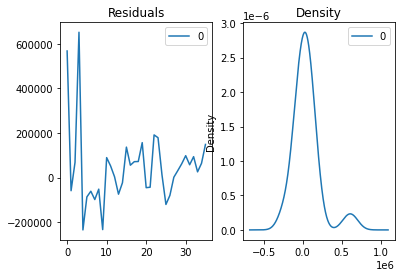

In [222]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [224]:
model_fit.predict(dynamic=False)
plt.show()

In [131]:
df_predict.to_csv("test")

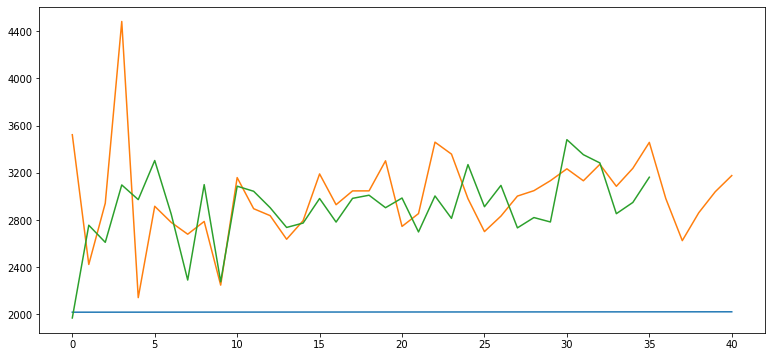

In [225]:
plt.figure(figsize=(13,6))
plt.plot(data_time_qty,label='training')
plt.plot(df_predict,label='training')
plt.show()

In [150]:
day_predict=['2022-06-01','2022-07-01','2022-08-01']

In [167]:
predict_num=model_fit.predict(n_periods=3,return_conf_int=True)

In [168]:
predict_num

2019-01-01         0.000000
2019-02-01    286903.814047
2019-03-01    248019.778868
2019-04-01    440278.341291
2019-05-01    348081.774582
2019-06-01    500340.720413
2019-07-01    315204.780639
2019-08-01      5896.887429
2019-09-01    544369.401677
2019-10-01    234455.982170
2019-11-01    390728.659881
2019-12-01    369146.966033
2020-01-01    441831.403870
2020-02-01    281319.713505
2020-03-01    291624.576764
2020-04-01    473826.418268
2020-05-01    324717.389873
2020-06-01    272341.045652
2020-07-01    358953.033559
2020-08-01    349136.489297
2020-09-01    285115.852606
2020-10-01    201535.302983
2020-11-01    359526.126176
2020-12-01    229631.654182
2021-01-01    436643.212836
2021-02-01    322859.691328
2021-03-01    313448.845861
2021-04-01    217180.048577
2021-05-01    429161.187862
2021-06-01    396115.662611
2021-07-01    551070.380748
2021-08-01    470604.550522
2021-09-01    436351.478368
2021-10-01    266269.439248
2021-11-01    438563.458043
2021-12-01    509196

In [151]:
day_predict

['2022-06-01', '2022-07-01', '2022-08-01']

In [140]:
# Forecast
n_periods = 3
confint = model_fit.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(data_time_qty.soluong), len(data_time_qty.soluong)+n_periods)

# make series for plotting purpose
# fc_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# # Plot
# plt.plot(data_time_qty.soluong)
# plt.plot(fc_series, color='darkgreen')
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)

# plt.title("Final Forecast of WWW Usage")
# plt.show()

In [141]:
index_of_fc

array([41, 42, 43])

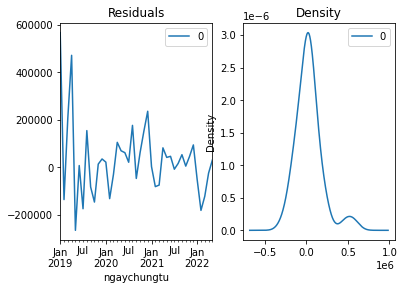

In [49]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [84]:
train = data_time_qty[5:36]
test =  data_time_qty[36:]

In [85]:
train.tail()

,soluong
ngaychungtu,
2021-08-01,424725
2021-09-01,475597
2021-10-01,407629
2021-11-01,463281
2021-12-01,543577


In [86]:
test

,soluong
ngaychungtu,
2022-01-01,369625
2022-02-01,239402
2022-03-01,325855
2022-04-01,390864
2022-05-01,440800


In [87]:
stepwise_model=auto_arima(train,start_p=1, start_q=1,max_p=5,max_q=5,
                          m=52,start_P=1, seasonal=True,d=1,D=0,trace=True, error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=785.545, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=785.420, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=778.916, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=783.669, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=776.916, Time=0.01 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=777.078, Time=0.12 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=780.592, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=789.565, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=783.422, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=775.953, Time=0.01 sec
 ARIMA(0,1,1)(1,0,0)[52]             : AIC=777.953, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[52]             : AIC=77

In [88]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 52),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [89]:
future_forecast= stepwise_model.predict(n_periods = len(test))


In [90]:
future_forecast=pd.DataFrame(future_forecast,index=test.index,columns=['Prediction'])


In [91]:
future_forecast

,Prediction
ngaychungtu,
2022-01-01,470103.732875
2022-02-01,470103.732875
2022-03-01,470103.732875
2022-04-01,470103.732875
2022-05-01,470103.732875


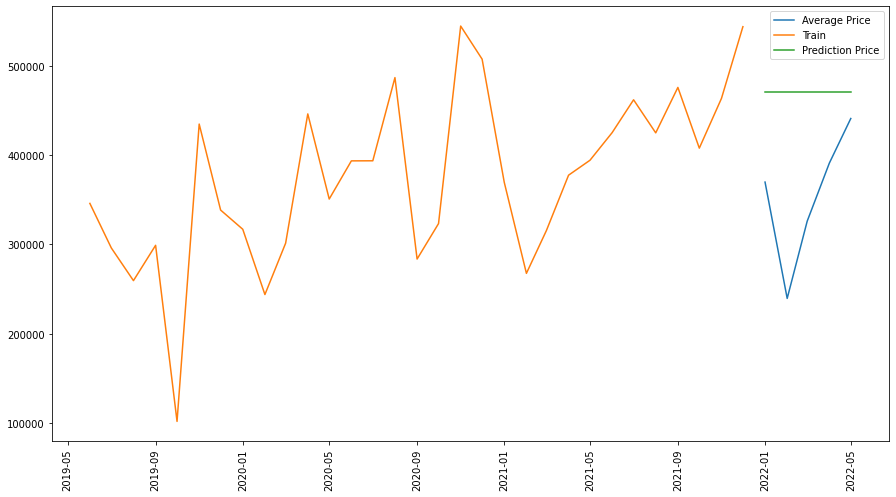

In [93]:
plt.figure(figsize=(15,8))
plt.plot(test, label='Average Price')
plt.plot(train, label='Train')
plt.plot(future_forecast, label='Prediction Price')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                soluong   No. Observations:                   36
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -457.538
Date:                Fri, 24 Jun 2022   AIC                            925.076
Time:                        14:40:22   BIC                            932.708
Sample:                             0   HQIC                           927.679
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7159      0.150     -4.789      0.000      -1.009      -0.423
ar.L2         -0.4559      0.174     -2.620      0.009      -0.797      -0.115
ar.L3          0.0596      0.196      0.305      0.7

e:\ipynb\penv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


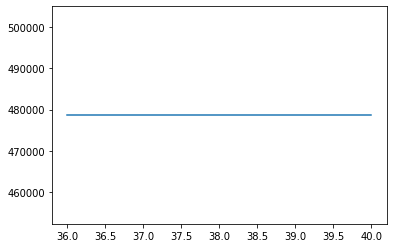

In [231]:
model = ARIMA(train.soluong, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
# lower_series = pd.Series(conf[:, 0], index=test.index)
# upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
# plt.figure(figsize=(12,5), dpi=100)
# plt.plot(train, label='training')
# plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
# plt.fill_between(lower_series.index, lower_series, upper_series, 
#                  color='k', alpha=.15)
# plt.title('Forecast vs Actuals')
# plt.legend(loc='upper left', fontsize=8)
# plt.show()

In [232]:
fc_series

36    478665.099308
37    478665.099308
38    478665.099308
39    478665.099308
40    478665.099308
dtype: float64

In [247]:
#Push MA test sample
df= pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQj8AnqyCPtfaol4vJg1Wu3TjZHeGCeLaeOMNp8l1dQXvX9XKSAsDXCew0pT1-3ziP-Qt8690Pd9KHm/pub?gid=1226600516&single=true&output=csv")


In [248]:
df.dtypes

ngaychungtu    object
masp           object
makenhkh       object
total           int64
Type           object
dtype: object

In [249]:
df

,ngaychungtu,masp,makenhkh,total,Type
0,2019-01-01,OH031,OTC,570241,Actual
1,2019-02-01,OH031,OTC,173570,Actual
2,2019-03-01,OH031,OTC,368347,Actual
3,2019-04-01,OH031,OTC,1034835,Actual
4,2019-05-01,OH031,OTC,73211,Actual
5,2019-06-01,OH031,OTC,412440,Actual
6,2019-07-01,OH031,OTC,406079,Actual
7,2019-08-01,OH031,OTC,360951,Actual
8,2019-09-01,OH031,OTC,428473,Actual
9,2019-10-01,OH031,OTC,146170,Actual


In [250]:
bq_values_insert(df,"d_ma_forecast",3)